In [2]:
import itertools
import numpy as np
from numpy import pi
from qiskit import Aer
from qiskit.compiler import transpile
from qiskit.algorithms.optimizers import SPSA
from quantum_neural_networks import StateDiscriminativeQuantumNeuralNetworks, QuantumState
import matplotlib.pyplot as plt

In [37]:
#Create de experimental results for 30 qubits with diffentes angles
th=np.linspace(0.,pi/2,num =30)
err=[]
for theta in th:
    state0 = QuantumState([np.array([ 1, 0])])
    state1 = QuantumState([np.array([np.cos(theta), np.sin(theta)])])
    #Parameters
    th_u, fi_u, lam_u = [pi], [0], [0]
    th1, th2  = [0], [pi]
    th_v1, th_v2 = [0], [0]
    fi_v1, fi_v2 = [0], [pi/2]
    lam_v1, lam_v2 = [pi],  [0]

    params = list(itertools.chain(th_u, fi_u, lam_u, th1, th2, th_v1, th_v2, fi_v1, fi_v2, lam_v1, lam_v2))
    # Initialize Discriminator
    discriminator = StateDiscriminativeQuantumNeuralNetworks( [ state0, state1 ] )
    
    # Calculate cost function
    results = discriminator.discriminate(SPSA(100), params)[1]
    err.append(results)
print(err)

[0.4951171875, 0.49365234375, 0.4560546875, 0.41064453125, 0.40966796875, 0.3671875, 0.33251953125, 0.31884765625, 0.2802734375, 0.27197265625, 0.25634765625, 0.22314453125, 0.20751953125, 0.181640625, 0.15625, 0.12890625, 0.115234375, 0.09521484375, 0.08447265625, 0.06005859375, 0.05517578125, 0.05322265625, 0.03857421875, 0.02490234375, 0.03125, 0.00927734375, 0.0087890625, 0.00146484375, 0.001953125, 0.34423828125]


Text(0, 0.5, 'Error probability')

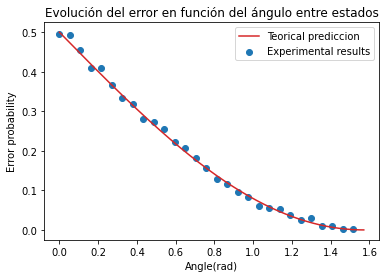

In [42]:
fig, ax = plt.subplots()
#Draw the experimental results
ax.scatter(th[:-1],err[:-1],label='Experimental results')
#Calculate the teorical predicción by Helstrom Bound, as a continious line
th_t=np.linspace(0.,pi/2,num =1000)
err_t=[]
for theta in th_t:
    state0 = QuantumState(np.array([ 1, 0]))
    state1 = QuantumState(np.array([np.cos(theta), np.sin(theta)]))
    err_t.append(StateDiscriminativeQuantumNeuralNetworks.helstrom_bound(state0,state1))
plt.plot( th_t, err_t,label='Teorical prediccion' ,color = 'tab:red')
ax.set_title('Evolución del error en función del ángulo entre estados')
ax.legend(loc = 'upper right')
ax.set_xlabel("Angle(rad)")
ax.set_ylabel("Error probability")